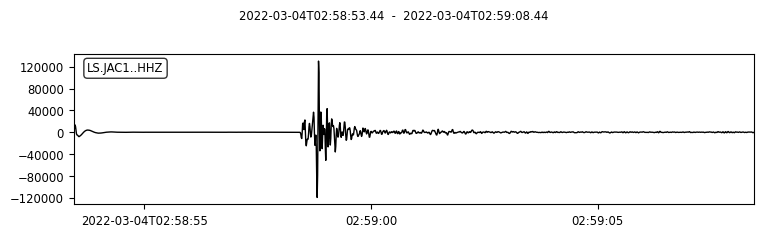

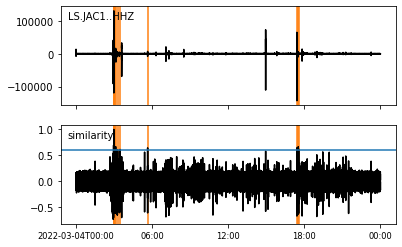

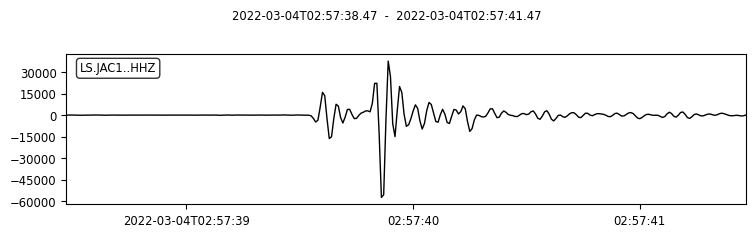

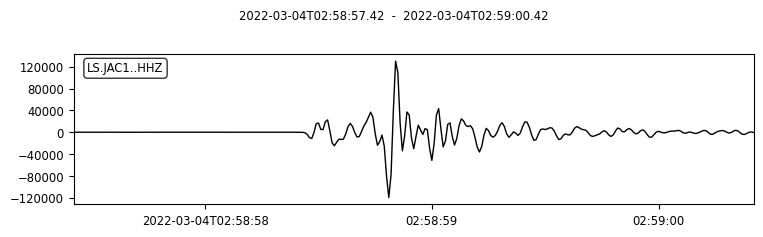

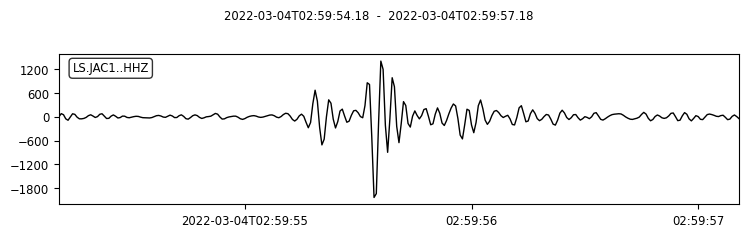

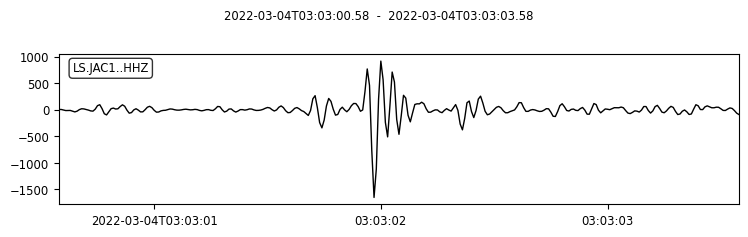

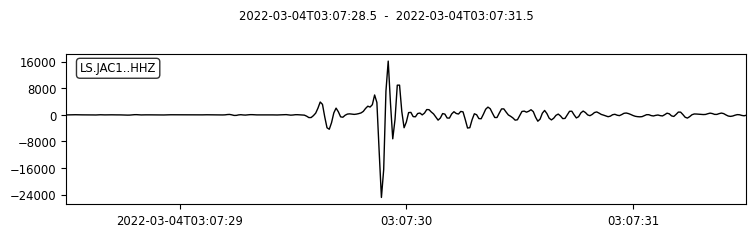

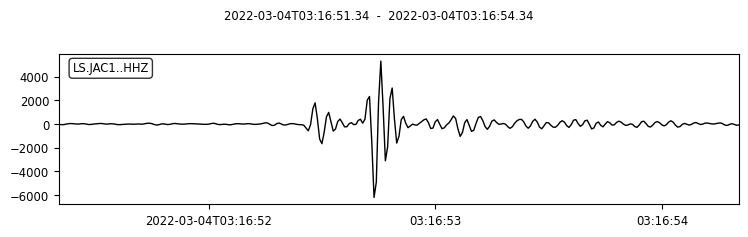

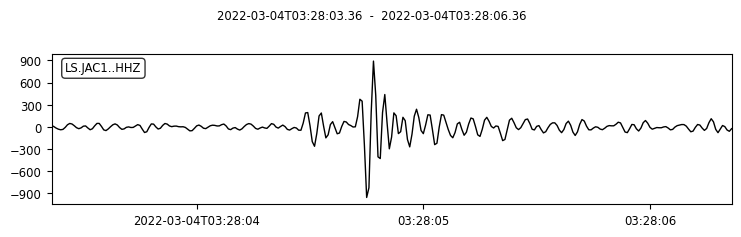

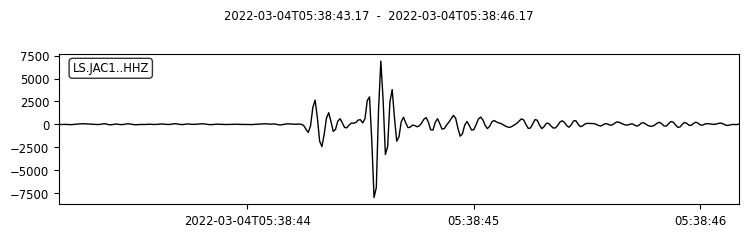

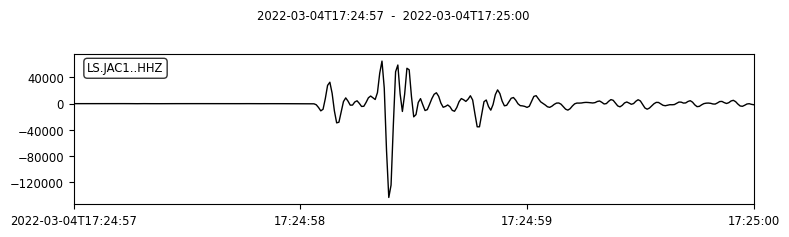

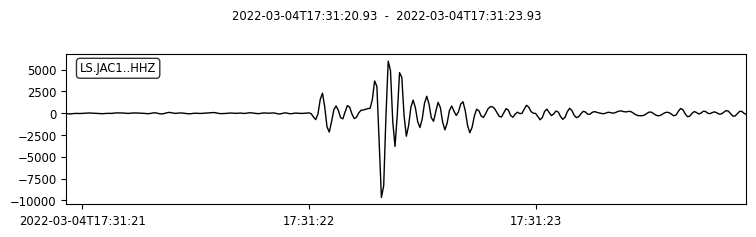

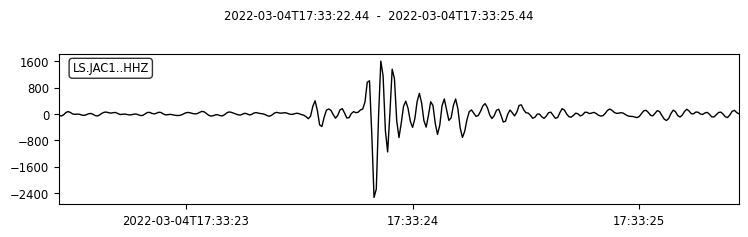

In [3]:
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector

template = read('../eventos/ref/*HHZ')
template.filter('bandpass', freqmin=2, freqmax=20)
template.plot()

pick = UTC('2022-03-04T02:58:58.423')
template.trim(pick, pick + 110)

stream = read('../DADOS/2022/LS/JAC1/HHZ.D/LS.JAC1..HHZ.D.2022.063')
stream.filter('bandpass', freqmin=2, freqmax=20)
height = 0.6  # similarity threshold
distance = 10  # distance between detections in seconds
detections, sims = correlation_detector(stream, template, height, distance, plot=stream)

path = "../eventos/"
j = "063"
import os

for d in detections:
    start = d['time'] - 1
    end = start + 3
    
    pasta = path + j
    if not os.path.exists(pasta + "/similar"):
        os.makedirs(pasta + "/similar")
        
    
        
    st = stream
    tr = st.copy()
    tr.trim(start, end)
                
    
                
                
    pasta = pasta + "/similar/" + str(d['time'])
    #if not os.path.exists(pasta):
    #    os.mkdir(pasta)
    tr.plot()
    #tr.write(pasta + ".HHZ", format='SAC')

In [ ]:
import glob

files = glob.glob(path+j+"/similar/*")

In [ ]:
for f in files:
    st = read(f)
    st.plot()